# Открытие робокафе в Москве

Возникла идея открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Необходимо подготовить исследование рынка для потенциальных инвесторов на основе открытых данных о заведениях общественного питания в Москве.

**План работы**

- **Шаг 1. Откроем файлы с данными, изучим общую информацию и подготовим данные**

    Путь к файлу:
    -  /datasets/rest_data.csv
    Неоходимо убедититься, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработать их.
     
    
- **Шаг 2. Проведем анализ данных**

    - Исследуем соотношение видов объектов общественного питания по количеству. Построим график.;
    - Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график;
    - Определим для какого вида объекта общественного питания характерно сетевое распространение;
    - Выясним, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест;
    - Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Определим какой вид предоставляет в среднем самое большое количество посадочных мест. Построим графики;
    - Выделим в отдельный столбец информацию об улице из столбца `address`;
    - Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?
    - Найдем число улиц с одним объектом общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?
    Сделаем общий вывод и дадим рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируем возможность развития сети.
    
    
- **Шаг 3. Подготовка презентации**

    Подготовим презентацию исследования для инвесторов.
         
      
- **Шаг 4. Напишем общий вывод**


- **Описание данных**

   Файл `/datasets/rest_data.csv` (открытые данные о заведениях общественного питания в Москве):

    - `id` — идентификатор объекта
    - `object_name` — название объекта общественного питания
    - `chain` — сетевой ресторан
    - `object_type` — тип объекта общественного питания
    - `address` — адрес
    - `number` — количество посадочных мест

## Загрузка данных и подготовка их к анализу
Загрузим данные в переменную. Оптимизируем данные для анализа. Убедимся, что тип данных в каждой колонке — правильный. Путь к файлу:

 -   /datasets/rest_data.csv.

In [39]:
# !pip install dadata

### Обзор данных

Откроем таблицу и посмотрим общую информацию о ней.

In [40]:
# импорт необходимых библиотек
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from io import BytesIO
import requests
pd.set_option('chained_assignment', None)

In [41]:
# настройка отображения датафреймов
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [42]:
# чтение файла с данными и сохранение в переменной
pth1 = '/datasets/rest_data.csv'
pth2 = 'C:/Users/tatar/downloads/rest_data.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')
    
# вывод первых 5 строк таблицы
display(df.head())

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [43]:
# получение общей информации о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Проверим, есть ли в исходном датафрейме дублирующиеся строки. Для этого посмортим повторения по всем столбцам, кроме `id`.

In [44]:
# подсчет дублирующихся строк в таблице
df.duplicated(subset=['object_name', 'chain', 'object_type', 'address', 'number'],
              keep=False).sum()

144

**Выводы**

* Необходимо заменить название столбца `number` на `number_of_seats` для корректности;
* Пропуски отсутствуют;
* Типы данных корректные;
* Есть дублирующиеся строки, необходимо их обработать.

### Предобработка данных

Заменим название столбца `number` на `number_of_seats` для корректности.

In [45]:
# замена названия столбца `number`
df = df.rename(columns={'number':'number_of_seats'})

# проверка
df.head()

,id,object_name,chain,object_type,address,number_of_seats
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Теперь можно приступить к поиску возможных аномалий в данных. Для начала посмотрим какие типы общественных заведений присутствуют в исходном датафрейме.

In [46]:
# вывод типов заведений общественного питания по количеству
df['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

Для лучшего отображения на графиках, заменим наименования типов `предприятие быстрого обслуживания` на `фаст-фуд` и `магазин (отдел кулинарии)` на `кулинария`.

In [47]:
# замена типов заведений общественного питания на более "удобочитаемые"
df['object_type'] = df['object_type'].str.replace('предприятие быстрого обслуживания', 'фаст-фуд', regex=True)
df['object_type'] = df['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария', regex=True)

# проверка
df['object_type'].value_counts()

кафе          6099
столовая      2587
ресторан      2285
фаст-фуд      1923
бар            856
буфет          585
кафетерий      398
закусочная     360
кулинария      273
Name: object_type, dtype: int64

Посмотрим на принадлежность к сетям.

In [48]:
# вывод принадлежности к сети общественного питания по количеству
df['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

Для лучшего отображения на графиках, заменим принадлежность к сетям с `да` на `сетевое` и с `нет` на `несетевое`.

In [49]:
# замена принадлежности к сети общественного питания на более "удобочитаемое"
df['chain'] = df['chain'].map({'нет':'несетевое','да':'сетевое'})

# проверка
df['chain'].value_counts()

несетевое    12398
сетевое       2968
Name: chain, dtype: int64

Перейдем к обработке дублирующихся строк, выведем их на экран и посмотрим какого характера имеются повторения.

In [50]:
# вывод строк с повторяющейся информацией
df[df.duplicated(subset=['object_name', 'chain',
                         'object_type', 'address', 'number_of_seats'], keep=False)]

,id,object_name,chain,object_type,address,number_of_seats
2374,28603,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,несетевое,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",100
2381,28611,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,несетевое,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",100
2869,25031,LALTRO BOSCO,несетевое,ресторан,"город Москва, улица Петровка, дом 10",145
3480,20913,Буфет Мади,несетевое,буфет,"город Москва, Ленинградский проспект, дом 64",40
3481,20914,Буфет Мади,несетевое,буфет,"город Москва, Ленинградский проспект, дом 64",40
4430,23741,СТОЛОВАЯ ГБОУ города Москвы № 384,несетевое,буфет,"город Москва, Беловежская улица, дом 67",100
4431,23759,СТОЛОВАЯ ГБОУ города Москвы № 384,несетевое,буфет,"город Москва, Беловежская улица, дом 67",100
4536,23381,Столовая «Комбинат питания КОСМОС»,несетевое,столовая,"город Москва, Новозаводская улица, дом 12/11",15
4537,23391,Столовая «Комбинат питания КОСМОС»,несетевое,столовая,"город Москва, Новозаводская улица, дом 12/11",15
5058,20019,LIFT,несетевое,кафе,"город Москва, Багратионовский проезд, дом 7, корпус 1",20


Теперь можно удалить дубликаты.

In [51]:
# удаление дубликатов
df.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address',
                           'number_of_seats'], inplace=True)

Теперь проверим сетевые заведения по названиям.

In [52]:
# вывод уникальных названий заведений сетевого питания
df.loc[df['chain'] == 'сетевое', 'object_name'].unique()

array(['ПИЦЦЕТОРИЯ', 'Брусника', 'Алло Пицца', 'Суши Wok', 'Тануки',
       "Домино'с Пицца", 'Готика', 'Му-Му', 'Хлеб насущный', 'TAJJ MAHAL',
       'ДАНКИН ДОНАТС', 'Вареничная №1', 'ШОКОЛАДНИЦА', 'Теремок',
       'Хинкальная', 'Шантимель', 'ТАНУКИ', 'Шоколадница', 'МУ-МУ',
       'Хинкальная City', 'КРУЖКА', 'СУШИ ВОК', 'ПРИМАВЕРА', 'Виктория',
       'Пиццерия «АКАДЕМИЯ»', 'Чебуречная СССР', 'МАКДОНАЛДС',
       'Grand Cru', 'Чайхона №1', 'Панчо Пицца', 'KFC', 'Сабвей',
       'ресторан «Якитория»', 'Советские времена', 'Кафе «Андерсон»',
       'Кафе «Subway»', 'Ресторан «Макдоналдс»', 'Суши Сет', 'Суши WoK',
       'Шоколад', 'Тирольские пироги', 'Гамбринус', 'Пицца Фабрика',
       'Subway', 'Кафе «Якитория»', 'Кафе «Тануки»', 'Сити Пицца',
       'Кружка', 'Кофе Хаус',
       'Кулинарная Лавка Братьев Караваевых Братья Караваевы', 'Суши Вок',
       'Прайм', 'Пицца Экспресс', 'Шоколадница Кофе Хаус', 'Николай',
       'Якитория', 'МАГНОЛИЯ', 'КОФЕ С СОБОЙ', 'Джаганнат', 'Волк

In [53]:
print('Количество сетей общественного питания:', len(df.loc[df['chain'] == 'сетевое', 
                                                            'object_name'].unique()))

Количество сетей общественного питания: 724


Мы видим большое количество дублирующихся названий, в разном написании. Для начала приведем все названия в нижний регистр,это позволит несколько сократить количество дублирующихся названий.

In [54]:
# приведение названий объектов к нижнему регистру
df['object_name'] = df['object_name'].str.lower()

In [55]:
print('Количество сетей общественного питания:', len(df.loc[df['chain'] == 'сетевое', 
                                                            'object_name'].unique()))

Количество сетей общественного питания: 577


Это частично решило проблему, но попробуем еще сократить количество дублирующихся названий хотя бы в популярных сетях. Для этого создадим список с некоторыми названиями популярных сетей, потом напишем функцию, которая будет менять название заведения на однотипное.

In [56]:
places_list = ['милти', 'макдоналдс', 'шоколадница', 'бургер кинг', 'теремок', "домино'с пицца",
               'крошка картошка', 'kfc', 'суши wok', 'папа джонс', 'додо пицца', 'subway', 'starbucks', 
               'му-му', 'кулинарная лавка братьев караваевых', 'мята lounge', 'costa coffee', 'кружка',
               'prime', 'дабл би', 'стардогs', 'космик', 'гудман', 'пронто', 'иль патио', 'ванвок', 
               'додо пицца', 'штолле', 'чайхона №1', 'андерсон', 'кофе хаус', 'тануки', 'торро гриль', 'магбургер',
               'coffeeshop', 'krispy creme', 'tutti frutti', 'upside down', 'азбука вкуса', 'алло пицца', 'moskalyan',
               'николай', 'бир хаус', 'в&в бургер', 'да пино', 'баскин роббинс', 'американ сити пицца', 'якитория',
               'маки-маки', 'старбакс', 'иль форно', 'урюк', 'вьеткафе', 'пицца хат', 'сушишоп', 'ваби-саби', 'данкин донатс',
               'менза', 'нияма', 'прайм', 'кофемания', 'волконский', 'хлеб насущный', 'суши тун', 'территория']

def name_equalizer(row):
    for name in places_list:
        if name in row['object_name']:
            return name
    return row['object_name']
            
df['object_name'] = df.apply(name_equalizer, axis=1)

In [57]:
print('Количество сетей общественного питания:', len(df.loc[df['chain'] == 'сетевое', 
                                                            'object_name'].unique()))

Количество сетей общественного питания: 350


**Выводы**

В ходе предобработки данных мы сделали следующее:
* Заменили название столбца `number` на `number_of_seats`;
* Заменили наименования типов общественных заведений: `предприятие быстрого обслуживания` на `фаст-фуд` и `магазин (отдел кулинарии)` на `кулинария`;
* Заменили наименование принадлежности к сетям: с `да` на `сетевое` и с `нет` на `несетевое`;
* Обработали дубликаты строк;
* Обработали дублирующиеся названия сетевых заведений питания.

## Анализ данных

Проанализируем данные, используя различные виды графиков.

### Соотношение видов объектов общественного питания по количеству

Cформируем сводную таблицу с соотношением видов общественного питания по количеству и построим столбчатую диаграмму c круговой диаграммой.

In [58]:
# формирование сводной таблицы
rest_by_types = (
    df
    .pivot_table(index='object_type', values='id', aggfunc='count')
    .sort_values(by='id', ascending=False)
    .rename(columns={'id': 'number'})
)

rest_by_types['ratio'] = round(rest_by_types['number'] / rest_by_types['number'].sum(), 3)
rest_by_types

,number,ratio
object_type,,
кафе,6071,0.397
столовая,2584,0.169
ресторан,2282,0.149
фаст-фуд,1898,0.124
бар,855,0.056
буфет,577,0.038
кафетерий,395,0.026
закусочная,349,0.023
кулинария,273,0.018


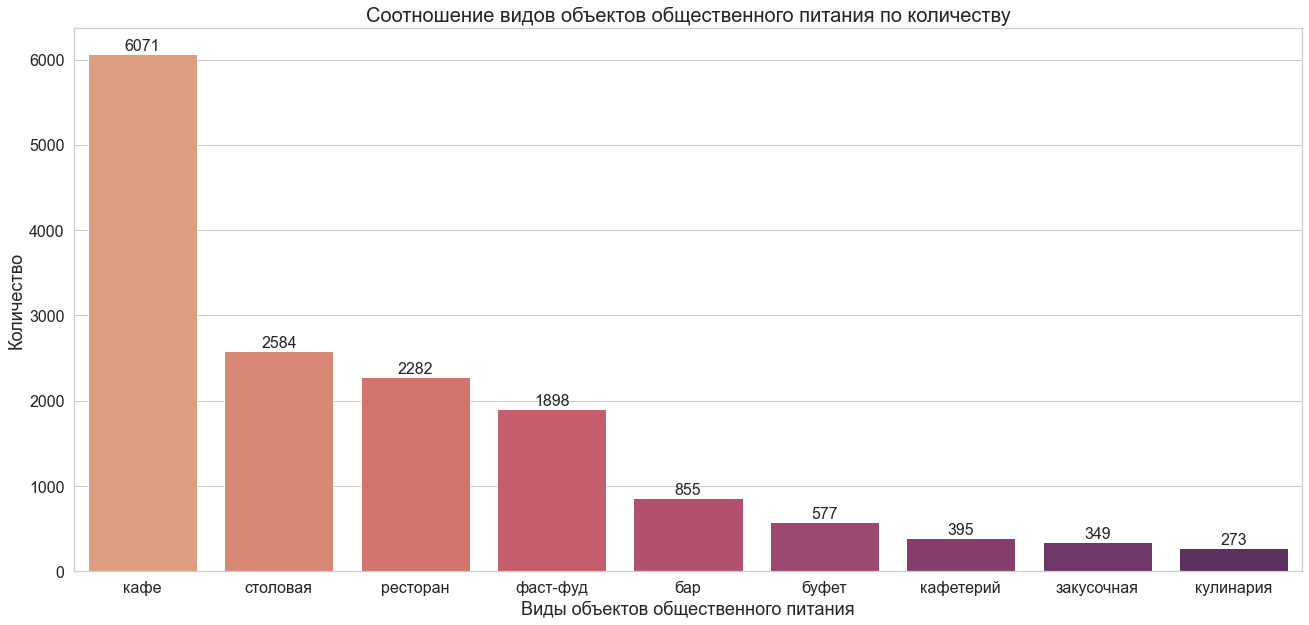

In [59]:
# построение столбчатой диаграммы
sns.set_theme(style='whitegrid')
plt.figure(figsize=(22,10))
plots = sns.barplot(x=rest_by_types.index, y='number', data=rest_by_types, palette='flare')
# добавление аннотаций к графику
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=16, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Соотношение видов объектов общественного питания по количеству', fontsize=20)
plt.tick_params(labelsize=16)
plt.xlabel('Виды объектов общественного питания', fontsize=18)
plt.ylabel('Количество', fontsize=18)
plt.show()

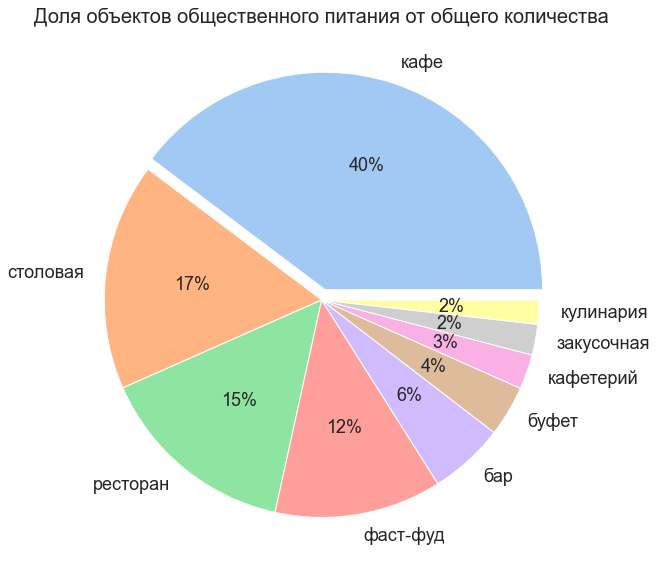

In [60]:
# построение круговой диаграммы
plt.figure(figsize=(22,10))
colors = sns.color_palette('pastel')
explode = [0.05, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(rest_by_types['number'], labels=rest_by_types.index, explode=explode, colors=colors, autopct='%.0f%%', 
        textprops={'fontsize': 18})
plt.title('Доля объектов общественного питания от общего количества', fontsize=20)
plt.show()

**Выводы**

* В Москве больше всего кафе (40% от общего количества);
* На втором месте столовые (17% от общего количества);
* На третьем - рестораны (15% от общего количества);
* Удивителен факт, что фаст-фуд занимает четвертую строчку по распространенности с 13% от общего количества.

### Соотношение сетевых и несетевых заведений по количеству

Cформируем сводную таблицу с соотношением сетевых и несетевых заведений по количеству и построим столбчатую диаграмму c круговой.

In [61]:
# формирование сводной таблицы
rest_by_chain = (
    df
    .pivot_table(index='chain', values='id', aggfunc='count')
    .sort_values(by='id', ascending=False)
    .rename(columns={'id': 'number'})
)

rest_by_chain['ratio'] = round(rest_by_chain['number'] / rest_by_chain['number'].sum(), 3)
rest_by_chain

,number,ratio
chain,,
несетевое,12320,0.806
сетевое,2964,0.194


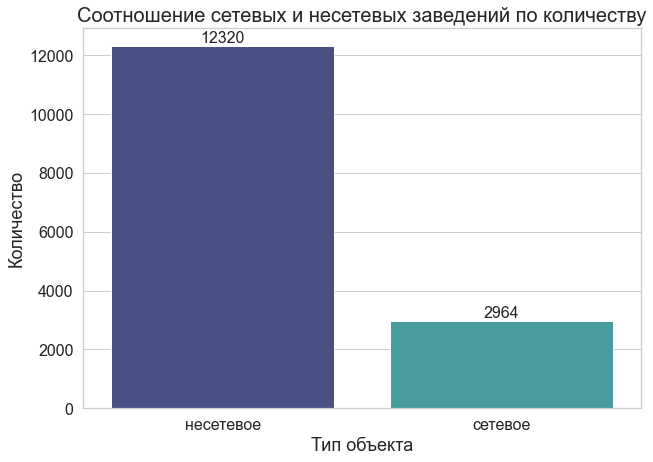

In [62]:
# построение столбчатой диаграммы
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,7))
plots = sns.barplot(x=rest_by_chain.index, y='number', data=rest_by_chain, palette='mako')
# добавление аннотаций к графику
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=16, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Соотношение сетевых и несетевых заведений по количеству', fontsize=20)
plt.tick_params(labelsize=16)
plt.xlabel('Тип объекта', fontsize=18)
plt.ylabel('Количество', fontsize=18)
plt.show()

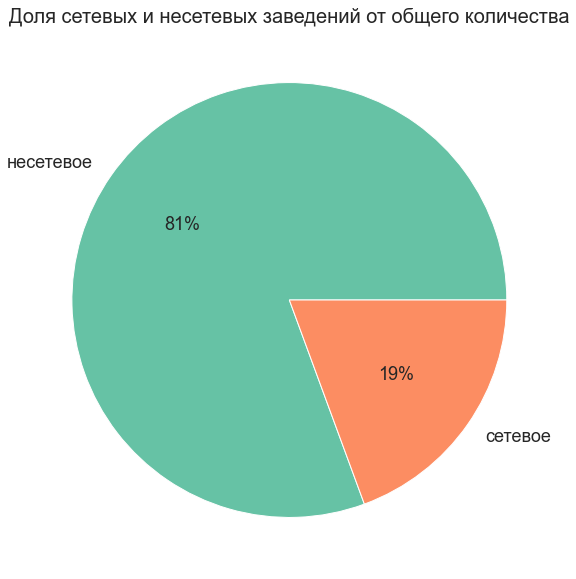

In [63]:
# построение круговой диаграммы
plt.figure(figsize=(22,10))
colors = sns.color_palette('Set2')
plt.pie(rest_by_chain['number'], labels=rest_by_chain.index, colors=colors, autopct='%.0f%%', textprops={'fontsize': 18})
plt.title('Доля сетевых и несетевых заведений от общего количества', fontsize=20)
plt.show()

**Выводы**

В Москве больше всего несетевых заведений (81% от общего количества), сетевых всего 19%.

### Определение видов объектов общественного питания для которых характерно сетевое распространение

Cформируем сводную таблицу с распределением сетевых и несетевых заведений по типу объекта и построим столбчатую диаграмму.

In [64]:
# формирование сводной таблицы
rest_by_types_x_chain = (
    df
    .pivot_table(index='object_type', values='id', columns='chain', aggfunc='count')
    .sort_values(by='сетевое', ascending=False)
)

rest_by_types_x_chain = rest_by_types_x_chain.reindex(columns=['сетевое', 'несетевое'])
rest_by_types_x_chain

chain,сетевое,несетевое
object_type,,
кафе,1396,4675
фаст-фуд,788,1110
ресторан,543,1739
кулинария,78,195
закусочная,56,293
кафетерий,52,343
бар,37,818
буфет,11,566
столовая,3,2581


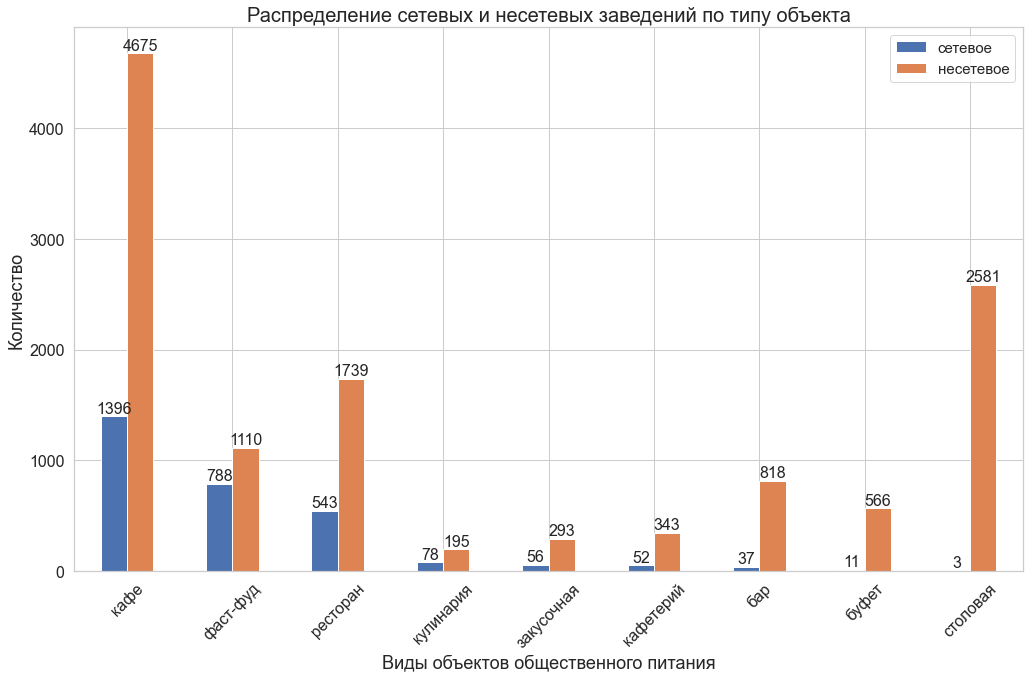

In [65]:
# построение столбчатой диаграммы
plt.figure(figsize=(17,10))
ax = plt.subplot(1,1,1)
plots = rest_by_types_x_chain.plot(kind='bar', ax=ax)
# добавление аннотаций к графику
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=16, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Распределение сетевых и несетевых заведений по типу объекта', fontsize=20)
plt.tick_params(labelsize=16)
plt.xlabel('Виды объектов общественного питания', fontsize=18)
plt.xticks(rotation=45)
plt.ylabel('Количество', fontsize=18)
plt.legend(fontsize=15)
plt.show()

Теперь посмотрим как распределяются доли сетевых заведений в различных типах заведений общественного питания.

In [66]:
# формирование сводной таблицы
chain_rest_by_types = round((rest_by_types_x_chain['сетевое'] / 
                       (rest_by_types_x_chain['сетевое'] + rest_by_types_x_chain['несетевое'])), 4).reset_index()
   
chain_rest_by_types.columns = ['object_type', 'ratio']
chain_rest_by_types.sort_values(by='ratio', inplace=True, ascending=False)
chain_rest_by_types

,object_type,ratio
1,фаст-фуд,0.4152
3,кулинария,0.2857
2,ресторан,0.2379
0,кафе,0.2299
4,закусочная,0.1605
5,кафетерий,0.1316
6,бар,0.0433
7,буфет,0.0191
8,столовая,0.0012


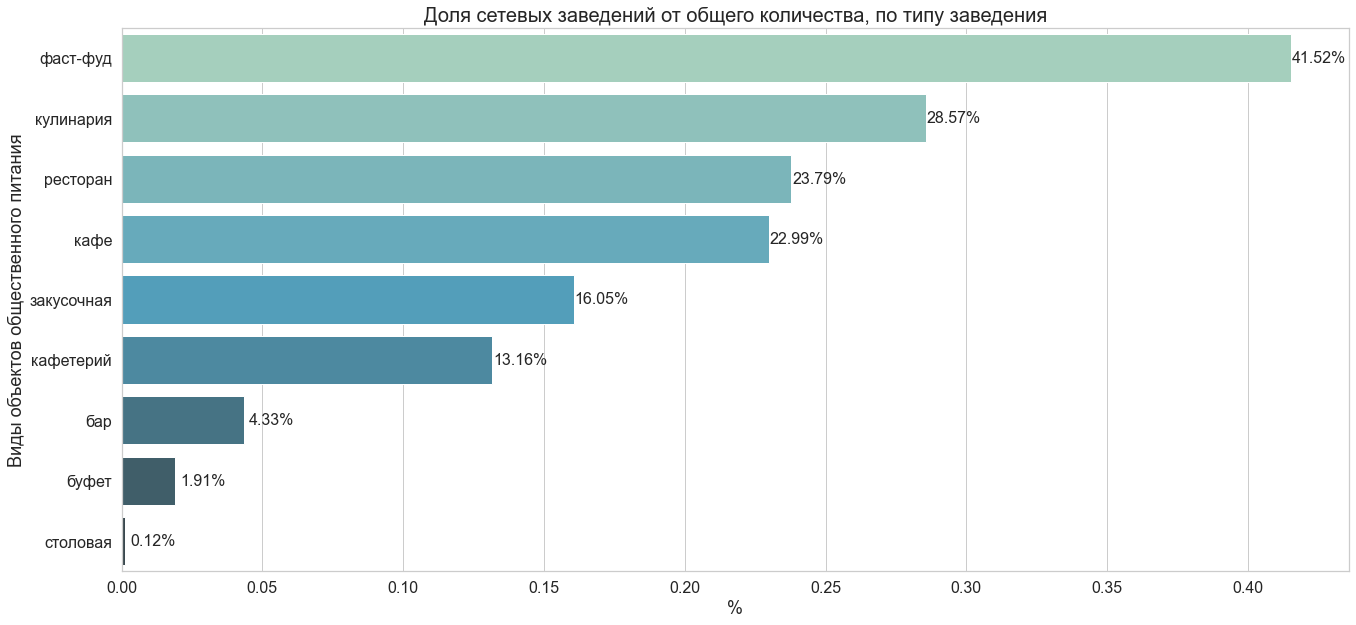

In [67]:
# построение столбчатой диаграммы
sns.set_theme(style='whitegrid')
plt.figure(figsize=(22,10))
plots = sns.barplot(x='ratio', y='object_type', data=chain_rest_by_types, palette='GnBu_d')
# добавление аннотаций к графику
for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.2%'),
                   (bar.get_x() + bar.get_width(),
                   bar.get_y() + bar.get_height() / 2), ha='center', va='center',
                   size=16, xytext=(28, 0),
                   textcoords='offset points')
plt.title('Доля сетевых заведений от общего количества, по типу заведения', fontsize=20)
plt.tick_params(labelsize=16)
plt.xlabel('%', fontsize=18)
plt.ylabel('Виды объектов общественного питания', fontsize=18)
plt.show()

**Выводы**

Сетевые заведения больше всего распространены в:
* Фаст-фуде, 41% от количества заведений (что вполне ожидаемо);
* Кулинариях, 29% от количества заведений;
* Ресторанах, 24% от количества заведений.

Сетевые заведения меньше всего распространены в:
* Барах, 4% от количества заведений;
* Буфетах, 2% от количества заведений;
* Столовых, ~1% от количества заведений.

In [68]:
# Код ревьюера

df.groupby('object_type').agg({'chain' : lambda x : (x == 'сетевое').mean()})

,chain
object_type,
бар,0.043275
буфет,0.019064
закусочная,0.160458
кафе,0.229946
кафетерий,0.131646
кулинария,0.285714
ресторан,0.237949
столовая,0.001161
фаст-фуд,0.415174


### Определение количества посадочных мест в сетевых заведениях

Cформируем вспомогательную таблицу с информацией только по сетевым заведениям, посмотрим общую информацию о распределении количества мест и построим гистограмму со скрипичной диаграммой.

In [69]:
# формирование вспомогательной таблицы
rest_data_chains_only = df.loc[df['chain'] == 'сетевое']
rest_data_chains_only.head()

,id,object_name,chain,object_type,address,number_of_seats
3,21894,пиццетория,сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,брусника,сетевое,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,алло пицца,сетевое,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,суши wok,сетевое,фаст-фуд,"город Москва, Азовская улица, дом 3",7
18,58565,тануки,сетевое,ресторан,"город Москва, Большая Академическая улица, дом 65",160


In [70]:
# вывод общей информации о распределении количества мест
rest_data_chains_only['number_of_seats'].describe()

count    2964.000000
mean       52.981107
std        57.152817
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number_of_seats, dtype: float64

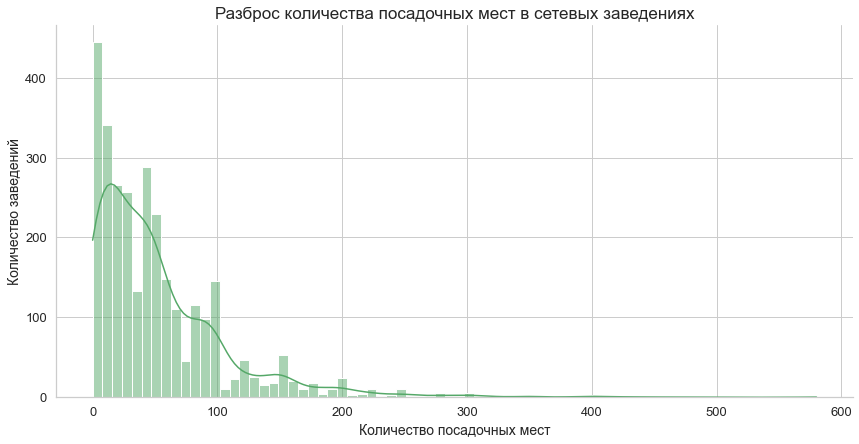

In [71]:
# построение гистограммы
sns.set_theme(style='whitegrid')
sns.displot(x='number_of_seats', data=rest_data_chains_only, kde = True, color='g', height=6, aspect=2.0,)
plt.title('Разброс количества посадочных мест в сетевых заведениях', fontsize=17)
plt.tick_params(labelsize=13)
plt.xlabel('Количество посадочных мест', fontsize=14)
plt.ylabel('Количество заведений', fontsize=14)
plt.show()

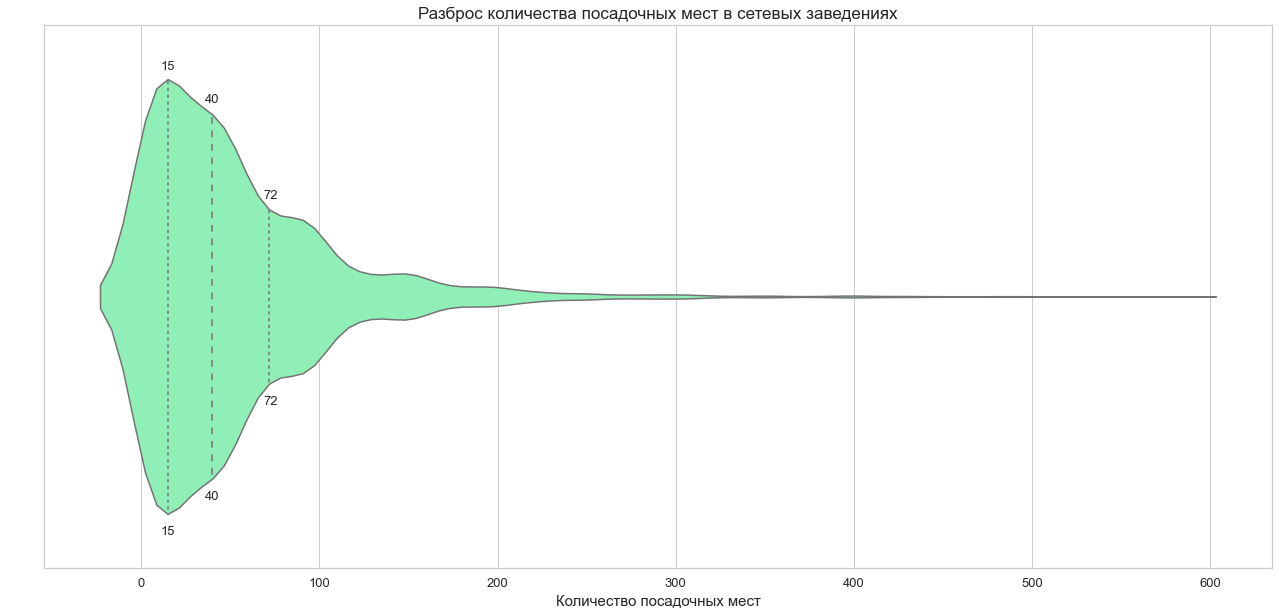

In [72]:
# построение скрипичной диаграммы
sns.set_theme(style='whitegrid')
plt.figure(figsize=(22,10))
plots = sns.violinplot(x='number_of_seats', data=rest_data_chains_only, palette='rainbow', inner='quartile')
# добавление аннотаций к графику
plots.annotate(round(np.percentile(rest_data_chains_only['number_of_seats'], 25)), 
               xy=(161, 80), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(rest_data_chains_only['number_of_seats'], 25)), 
               xy=(161, 545), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(rest_data_chains_only['number_of_seats'], 50)), 
               xy=(205, 115), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(rest_data_chains_only['number_of_seats'], 50)), 
               xy=(205, 512), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(rest_data_chains_only['number_of_seats'], 75)), 
               xy=(263, 210), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(rest_data_chains_only['number_of_seats'], 75)), 
               xy=(263, 416), xycoords='figure points', fontsize=13)
plt.title('Разброс количества посадочных мест в сетевых заведениях', fontsize=17)
plt.tick_params(labelsize=13)
plt.xlabel('Количество посадочных мест', fontsize=15)
plt.show()

Выясним, какое количества мест входит в 10% сетевых заведений.

In [73]:
print('10% сетевых заведений имеют от', round(np.percentile(rest_data_chains_only['number_of_seats'], 90)), 'мест и более.')

10% сетевых заведений имеют от 120 мест и более.


На следующем этапе выясним количество сетей и медианное значение посадочных мест в них. Для этого сформируем таблицу с группировкой сетей по названию.

In [74]:
# формирование вспомогательной таблицы
rest_by_chains = (
    rest_data_chains_only
    .pivot_table(index='object_name', aggfunc={'id': len})
    .sort_values(by='id', ascending=False)
    .rename(columns={'id': 'number'})
)
rest_by_chains.head(10)

,number
object_name,
kfc,188
шоколадница,185
макдоналдс,172
бургер кинг,159
теремок,111
домино'с пицца,99
крошка картошка,96
милти,81
суши wok,76


Теперь посмотрим на распределение количества сетей (предварительно удалив сети с одним заведением, их много из-за разного написания одного названия).

In [75]:
# вывод общей информации о распределении количества заведений в сети
rest_by_chains.loc[rest_by_chains['number'] != 1, 'number'].describe()

count    192.000000
mean      14.614583
std       29.668984
min        2.000000
25%        2.000000
50%        4.000000
75%       10.000000
max      188.000000
Name: number, dtype: float64

Получается интересная картина. Можно разделить сети на 4 группы:

* **маленькие сети** с количеством заведений меньше 2;
* **небольшие сети** с количеством заведений от 2 до 4;
* **средние сети** с количеством заведений от 4 до 10;
* **большие сети** с количеством заведений свыше 10.

Сгруппируем нашу таблицу `rest_by_chains` по названиям групп и выведем общую информацию о распределении количества мест в них.

In [76]:
# напишем функцию
def chain_group(chain): 
    if chain <= 2:
        return 'маленькая сеть'
    if chain <= 4:
        return 'небольшая сеть'
    if chain <= 10:
        return 'средняя сеть'
    return 'большая сеть'

# с помощью цикла добавим столбец с количеством заведений в сети
for value in rest_data_chains_only['object_name'].unique():
    number = rest_data_chains_only.loc[rest_data_chains_only['object_name'] == value, 'id'].count()
    rest_data_chains_only.loc[rest_data_chains_only['object_name'] == value, 'number'] = number
    
# добавим столбец в таблицу, используя функцию
rest_data_chains_only['chain_category'] = rest_data_chains_only['number'].apply(chain_group)
rest_data_chains_only.head(10)

,id,object_name,chain,object_type,address,number_of_seats,number,chain_category
3,21894,пиццетория,сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40,2.0,маленькая сеть
6,148815,брусника,сетевое,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,8.0,средняя сеть
13,22579,алло пицца,сетевое,кафе,"город Москва, улица Авиаторов, дом 14",32,16.0,большая сеть
16,144107,суши wok,сетевое,фаст-фуд,"город Москва, Азовская улица, дом 3",7,76.0,большая сеть
18,58565,тануки,сетевое,ресторан,"город Москва, Большая Академическая улица, дом 65",160,47.0,большая сеть
25,81554,домино'с пицца,сетевое,кафе,"город Москва, Алтуфьевское шоссе, дом 56",24,99.0,большая сеть
30,24387,готика,сетевое,ресторан,"город Москва, Ангарская улица, дом 39",65,1.0,маленькая сеть
33,69243,суши wok,сетевое,кафе,"город Москва, проспект Андропова, дом 30",4,76.0,большая сеть
37,24968,му-му,сетевое,кафе,"город Москва, улица Арбат, дом 4, строение 1",125,32.0,большая сеть
38,127980,хлеб насущный,сетевое,кафе,"город Москва, улица Арбат, дом 6/2",20,33.0,большая сеть


In [77]:
# вывод общей информации о распределении количества мест
(
    rest_data_chains_only
    .loc[rest_data_chains_only['number'] != 1]
    .groupby('chain_category')['number_of_seats']
    .describe()
    .sort_values(by='count', ascending=False)
)

,count,mean,std,min,25%,50%,75%,max
chain_category,,,,,,,,
большая сеть,2208.0,50.014493,55.944433,0.0,14.00,38.0,65.25,580.0
средняя сеть,351.0,59.336182,59.547780,0.0,20.00,45.0,85.00,400.0
небольшая сеть,139.0,70.561151,64.119919,0.0,25.00,50.0,97.00,356.0
маленькая сеть,108.0,59.111111,55.827560,0.0,19.25,43.5,90.00,320.0


Построим диаграмму размаха.

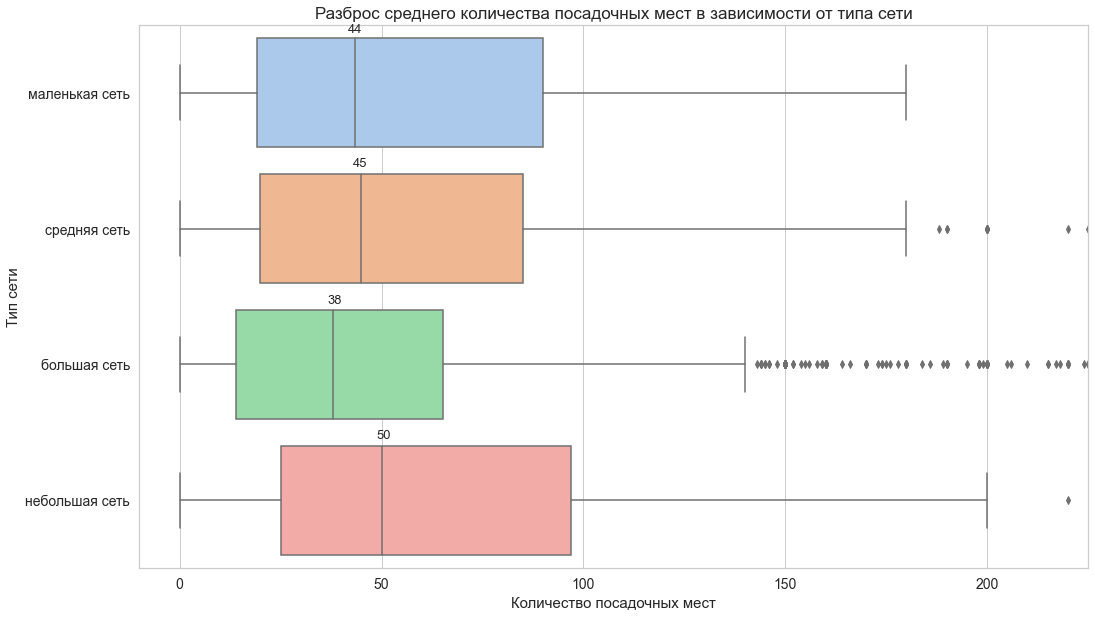

In [88]:
# построение диаграммы размаха
sns.set_theme(style='whitegrid')
plt.figure(figsize=(17,10))
plots = sns.boxplot(x='number_of_seats', y='chain_category', 
                    data=rest_data_chains_only.loc[rest_data_chains_only['number'] != 1], palette='pastel')
plots.set_xlim(-10,225)
# добавление аннотаций к графику
plots.annotate(round(np.percentile(
    rest_data_chains_only.loc[(rest_data_chains_only['number'] != 1) & 
                              (rest_data_chains_only['chain_category'] == 'маленькая сеть'), 
                              'number_of_seats'], 50)), xy=(348, 584), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(
    rest_data_chains_only.loc[(rest_data_chains_only['number'] != 1) &
                              (rest_data_chains_only['chain_category'] == 'средняя сеть'), 
                              'number_of_seats'], 50)), xy=(353, 450), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(
    rest_data_chains_only.loc[(rest_data_chains_only['number'] != 1) &
                              (rest_data_chains_only['chain_category'] == 'большая сеть'), 
                              'number_of_seats'], 50)), xy=(327, 313), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(
    rest_data_chains_only.loc[(rest_data_chains_only['number'] != 1) &
                              (rest_data_chains_only['chain_category'] == 'небольшая сеть'), 
                              'number_of_seats'], 50)), xy=(376, 178), xycoords='figure points', fontsize=13)
plt.title('Разброс среднего количества посадочных мест в зависимости от типа сети', fontsize=17)
plt.tick_params(labelsize=14)
plt.xlabel('Количество посадочных мест', fontsize=15)
plt.ylabel('Тип сети', fontsize=15)
plt.show()

**Выводы**

Мы выяснили, что для сетевых заведений характерно много заведений с небольшим количеством посадочных мест в каждом. Более 400 заведений вообще не имеют посадочных мест, медианное значение посадочных мест - 40, среднее - 52. Присутствует некоторое количество сетевых заведений (10% от общего количества) с большим количеством мест, от 120 до 580.

Но главное - если взять **случайную сеть**, то есть большая вероятность наткнуться на **большую сеть** (с количеством заведений больше 10) с **небольшим числом посадочных мест** (около 38).

### Определение среднего количества посадочных мест в каждом виде заведения

Посмотрим общую информацию о распределении количества мест в каждом виде заведения и построим диаграммы размаха.

In [79]:
# вывод общей информации о распределении количества мест
df.groupby('object_type')['number_of_seats'].describe().sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
столовая,2584.0,130.337848,95.189104,0.0,51.5,103.0,200.0,1400.0
ресторан,2282.0,96.884750,94.781446,0.0,46.0,80.0,114.0,1500.0
бар,855.0,43.533333,67.112342,0.0,20.0,35.0,50.0,1700.0
буфет,577.0,51.509532,56.499972,0.0,15.0,32.0,80.0,320.0
кафе,6071.0,39.785703,37.751163,0.0,15.0,30.0,50.0,533.0
кафетерий,395.0,9.184810,14.677023,0.0,0.0,6.0,12.0,200.0
фаст-фуд,1898.0,20.808219,38.552842,0.0,0.0,6.0,25.0,580.0
закусочная,349.0,7.825215,16.865453,0.0,0.0,0.0,10.0,216.0
кулинария,273.0,5.589744,9.872729,0.0,0.0,0.0,8.0,50.0


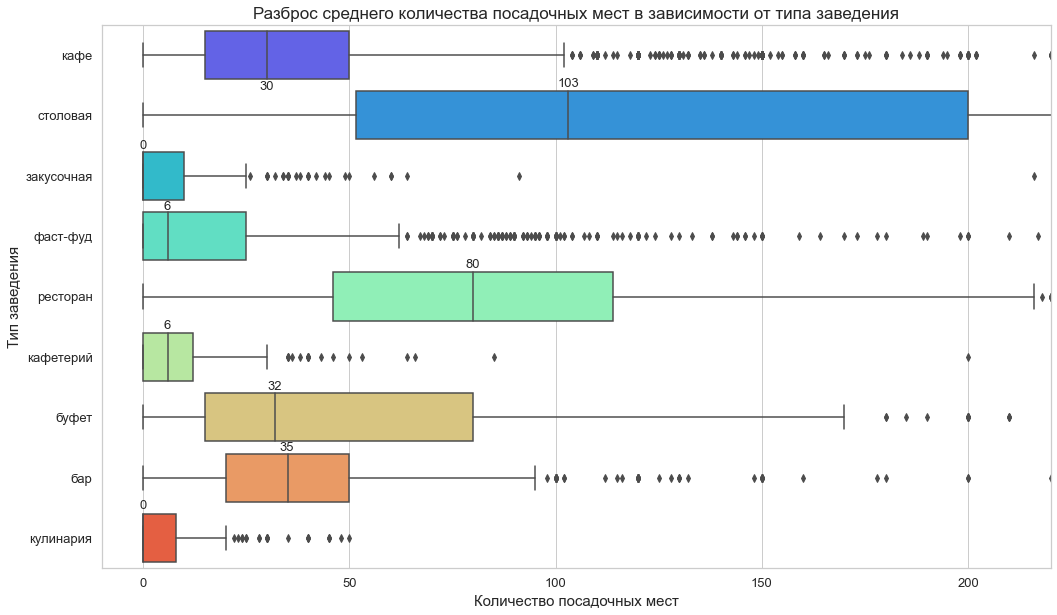

In [96]:
# построение диаграммы размаха
sns.set_theme(style='whitegrid')
plt.figure(figsize=(17,10))
plots = sns.boxplot(x='number_of_seats', y='object_type', data=df, palette='rainbow')
plots.set_xlim(-10,220)
# добавление аннотаций к графику
plots.annotate(round(np.percentile(df.loc[df['object_type'] == 'кулинария', 'number_of_seats'], 50)), 
               xy=(140, 106), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(df.loc[df['object_type'] == 'бар', 'number_of_seats'], 50)), 
               xy=(279, 164), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(df.loc[df['object_type'] == 'буфет', 'number_of_seats'], 50)), 
               xy=(267, 225), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(df.loc[df['object_type'] == 'кафетерий', 'number_of_seats'], 50)), 
               xy=(163, 286), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(df.loc[df['object_type'] == 'ресторан', 'number_of_seats'], 50)), 
               xy=(465, 347), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(df.loc[df['object_type'] == 'фаст-фуд', 'number_of_seats'], 50)), 
               xy=(163, 405), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(df.loc[df['object_type'] == 'закусочная', 'number_of_seats'], 50)), 
               xy=(140, 466), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(df.loc[df['object_type'] == 'столовая', 'number_of_seats'], 50)), 
               xy=(558, 528), xycoords='figure points', fontsize=13)
plots.annotate(round(np.percentile(df.loc[df['object_type'] == 'кафе', 'number_of_seats'], 50)), 
               xy=(259, 525), xycoords='figure points', fontsize=13)
plt.title('Разброс среднего количества посадочных мест в зависимости от типа заведения', fontsize=17)
plt.tick_params(labelsize=13)
plt.xlabel('Количество посадочных мест', fontsize=15)
plt.ylabel('Тип заведения', fontsize=15)
plt.show()

**Выводы**

* Для столовых, ресторанов и баров характерно большое количество посадочных мест. Присутствуют выбросы в большую сторону;
* По среднему количеству посадочных мест топ-3 тот же: столовые - 103 места, рестораны - 80 мест и бары - 35 мест;
* Для фаст-фуда, закусочных и кулинарий характерно небольшое количество мест, что логично.

### Определение топ-10 улиц по количеству объектов общественного питания

Попробуем выделить названия улиц двумя способами:

**Первый способ.** Выделим в отдельный столбец информацию об улице из столбца `address`. Алгоритм действий будет следующий: создадим пустой список, куда с помощью цикла будем добавлять только улицы по поиску места названия улицы в адресе. Если во фразе присутствует Москва, то началом места поиска будет выражение `город Москва`, концом места поиска - `дом` либо `владение`. Если же Москва не прописана в адресе, то будем использовать только поиск по концу фразы (`дом` либо `владение`).

In [97]:
for street in df['address'].unique():  
    if 'Москва' in street:
        if 'владение' in street:
            start = street.find('город Москва')
            end = street.find('владение')
            df.loc[df['address'] == street, 'street_name'] = street[start+14:end-2]
        else:
            start = street.find('город Москва')
            end = street.find('дом')
            df.loc[df['address'] == street, 'street_name'] = street[start+14:end-2]
    else:
        if 'владение' in street:
            end = street.find('владение')
            df.loc[df['address'] == street, 'street_name'] = street[:end-2]
        else:
            end = street.find('дом')
            df.loc[df['address'] == street, 'street_name'] = street[:end-2]

**Второй способ.** Напишем регулярное выражение, которое будет выделять из адреса только информацию про улицы/проспекты/шоссе/переулки/проезды/набережные/бульвары по следующему методу: в новый столбец `street_name` будет записываться информация, расположенная после фразы **город Москва,** и перед фразой **дом** или **владение**.

In [98]:
# формирование столбца с названием улиц
df['street_name'] = df['address'].str.extract('город Москва,\s([\w\s\S-]+),\s(?:дом|владение)')

# проверка
df.head()

,id,object_name,chain,object_type,address,number_of_seats,street_name
0,151635,сметана,несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,несетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,несетевое,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,несетевое,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


Проверим количество пропущенных значений.

In [99]:
# проверка количества пропущенных значений
df['street_name'].isna().sum()

211

В пропущенных значениях с помощью цикла запишем информацию, расположенную перед фразой **дом** или **владение**. Так мы исключим написания адресов, не содержащих фразу **город Москва** в начале.

In [100]:
for value in df.loc[df['street_name'].isna(), 'address'].unique():
    street = df.loc[df['address'] == value, 'address'].str.extract('([\w\s\S-]+),\s(?:дом|владение)', expand=False)
    df.loc[df['address'] == value, 'street_name'] = street

В оставшихся пропущенных значениях с помощью цикла запишем информацию, расположенную после фразы **город Москва**, и перед фразой **строение**. Так мы исключим написания адресов, не содержащих фразу **дом** или **владение** в конце.

In [101]:
for value in df.loc[df['street_name'].isna(), 'address'].unique():
    street = df.loc[df['address'] == value, 'address'].str.extract('город Москва,\s([\w\s\S-]+),\sстроение', expand=False)
    df.loc[df['address'] == value, 'street_name'] = street

Наконец, в последних пропущенных значениях с помощью цикла запишем информацию, расположенную после фразы **город Москва**. Таким образом мы охватили все возможные варианты написания адреса.  К примеру, в городе Зеленограде нет улиц, есть корпуса с номерами, для корректной идентификации вместо улицы логичнее применять полную запись формата "город Зеленоград, корпус ХХХ".

In [102]:
for value in df.loc[df['street_name'].isna(), 'address'].unique():
    street = df.loc[df['address'] == value, 'address'].str.extract('город Москва,\s([\w\s\S-]+)', expand=False)
    df.loc[df['address'] == value, 'street_name'] = street

Проверим количество пропущенных значений.

In [103]:
# проверка количества пропущенных значений
df['street_name'].isna().sum()

0

In [104]:
# проверка
df.head(20)

,id,object_name,chain,object_type,address,number_of_seats,street_name
0,151635,сметана,несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,несетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,несетевое,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,несетевое,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
5,27429,стол. при гоу сош № 1051,несетевое,столовая,"город Москва, Абрамцевская улица, дом 15, корпус 1",240,Абрамцевская улица
6,148815,брусника,сетевое,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,переулок Сивцев Вражек
7,20957,буфет мтуси,несетевое,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90,Авиамоторная улица
8,20958,кпф семья-1,несетевое,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",150,Авиамоторная улица
9,28858,столовая мтуси,несетевое,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",120,Авиамоторная улица


Cформируем сводную таблицу с распределением количества объектов общественного питания по улицам, выделим топ-10 и построим столбчатую диаграмму.

In [105]:
# формирование сводной таблицы
rest_by_streets = (
    df
    .pivot_table(index='street_name', values='id', aggfunc='count')
    .sort_values(by='id', ascending=False)
    .rename(columns={'id': 'number'})
)
rest_by_streets = rest_by_streets[:10]
rest_by_streets

,number
street_name,
проспект Мира,204
Профсоюзная улица,182
Ленинградский проспект,172
Пресненская набережная,167
Варшавское шоссе,162
Ленинский проспект,148
проспект Вернадского,128
Кутузовский проспект,114
Каширское шоссе,111


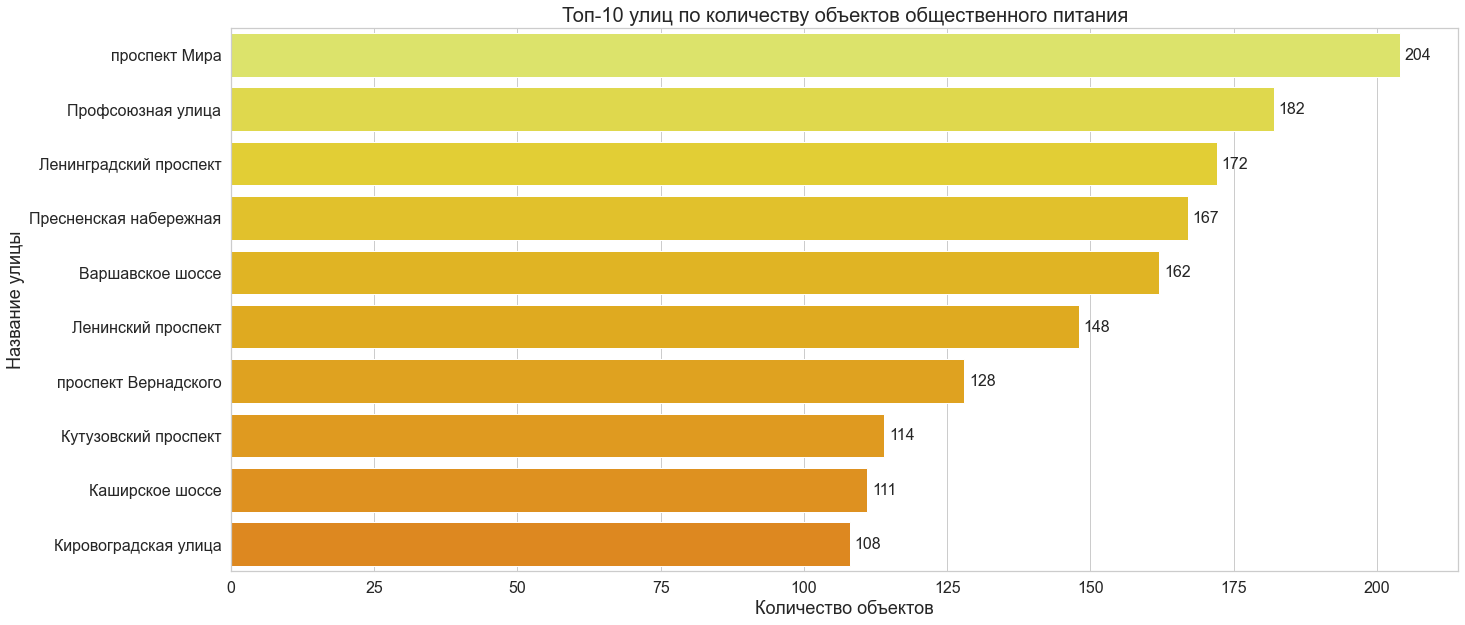

In [106]:
# построение столбчатой диаграммы
sns.set_theme(style='whitegrid')
plt.figure(figsize=(22,10))
plots = sns.barplot(x='number', y=rest_by_streets.index, data=rest_by_streets, palette='Wistia')
# добавление аннотаций к графику
for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.0f'),
                   (bar.get_x() + bar.get_width(),
                   bar.get_y() + bar.get_height() / 2), ha='center', va='center',
                   size=16, xytext=(18, 0),
                   textcoords='offset points')
plt.title('Топ-10 улиц по количеству объектов общественного питания', fontsize=20)
plt.tick_params(labelsize=16)
plt.xlabel('Количество объектов', fontsize=18)
plt.ylabel('Название улицы', fontsize=18)
plt.show()

Cформируем вспомогательную таблицу с информацией по объектам, находящимся на топ-10 улиц, для определения районов города.

In [107]:
# запишем названия улиц в отдельный список
top_10_streets = rest_by_streets.index.to_list()

# произведем выборку по совпадению названий в списке
top_10_streets_df = df.loc[df['street_name'].isin(top_10_streets)]

# проверка
top_10_streets_df.head()

,id,object_name,chain,object_type,address,number_of_seats,street_name
151,155973,андерсон,сетевое,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе
152,23618,subway,сетевое,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе
153,155852,кафе «ламаджо»,несетевое,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе
154,152556,шаурма в пите,несетевое,фаст-фуд,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
155,120658,выпечка,несетевое,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе


Для определения районов, где находятся объекты с топ-10 улиц, воспользуемся бесплатным API Dadata. Для начала сформируем список адресов, по которым с помощью цикла сделаем запрос, с целью получения полной информации об адресе. Далее из ответа на запрос выделим только названия районов, сформируем новый список и запишем в новый столбец `district_name` датафрейма. 

API Геокодер Яндекс Карт не стал использовать из за ограничений по использованию. Согласно условиям, результаты геокодирования нельзя сохранять и использовать без карты, результаты должны быть отображены на общедоступной карте.

In [ ]:
# # использование API Dadata
# from dadata import Dadata

# # я знаю, что токены и пароли выкладывать не рекомендуется
# token = "dc95452ac07c04fa005e94e22b5132a15ad096ee"
# secret = "87ee5a8eb97237d122f7ff7c74e3d7b47a98c4ff"
# dadata = Dadata(token, secret)

# # создание списка с адресами из топ-10 улиц
# top_10_streets_addresses = top_10_streets_df['address'].to_list()

# # создание пустого списка с названиями районов
# top_10_streets_districts = []

# # цикл с запросом полной информации по адресам из списка топ-10
# for value in top_10_streets_addresses:
#     result = dadata.clean(name="address", source=value)
#     top_10_streets_districts.append(result.get('city_district'))
    
# # добавление столбца с названиями районов в датафрейм
# top_10_streets_df['district_name'] =  top_10_streets_districts

# # проверка
# top_10_streets_df.head()

In [108]:
# загрузка результатов использования API
spreadsheet_id = '1o-k5qtI0VGYW-TenVfjwtWDM7IUX3HCcNIjLf3g8J5Q'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
top_10_streets_df = pd.read_csv(BytesIO(r.content))
top_10_streets_df = top_10_streets_df.drop(columns='Unnamed: 0')
top_10_streets_df.head()

,id,object_name,chain,object_type,address,number_of_seats,street_name,district_name
0,155973,андерсон,сетевое,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе,Донской
1,23618,subway,сетевое,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе,Донской
2,155852,кафе «ламаджо»,несетевое,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе,Донской
3,152556,шаурма в пите,несетевое,фаст-фуд,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе,Нагорный
4,120658,выпечка,несетевое,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе,Нагорный


Cформируем сводную таблицу с распределением количества объектов общественного питания по районам из топ-10 улиц и построим столбчатую диаграмму.

In [109]:
# формирование сводной таблицы
rest_by_districts = (
    top_10_streets_df
    .pivot_table(index='district_name', values='id', aggfunc='count')
    .sort_values(by='id', ascending=False)
    .rename(columns={'id': 'number'})
)

rest_by_districts

,number
district_name,
Пресненский,167
Чертаново Центральное,88
Тропарево-Никулино,87
Аэропорт,65
Мещанский,63
Обручевский,63
Свиблово,62
Дорогомилово,61
Нагатино-Садовники,57


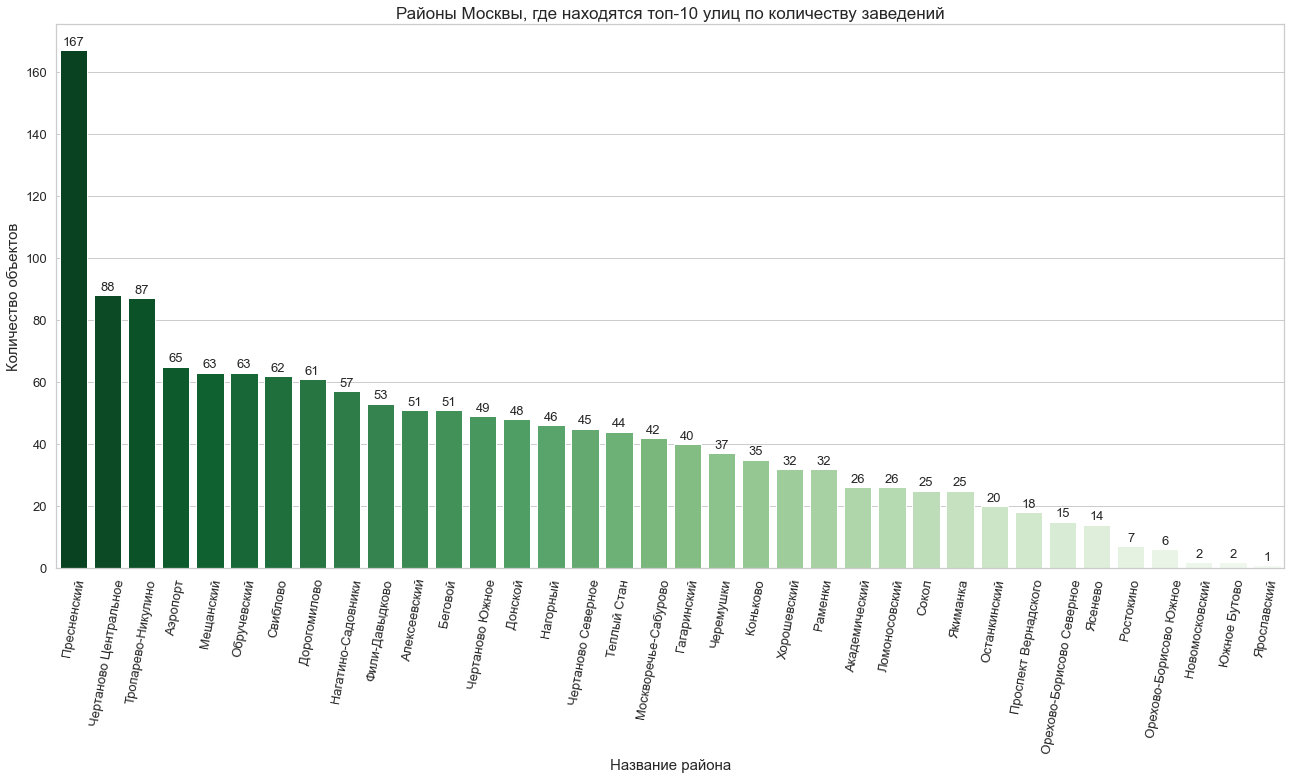

In [110]:
# построение столбчатой диаграммы
sns.set_theme(style='whitegrid')
plt.figure(figsize=(22,10))
plots = sns.barplot(x=rest_by_districts.index, y='number', data=rest_by_districts, palette='Greens_r')
# добавление аннотаций к графику
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Районы Москвы, где находятся топ-10 улиц по количеству заведений', fontsize=17)
plt.tick_params(labelsize=13)
plt.xlabel('Название района', fontsize=15)
plt.xticks(rotation=80)
plt.ylabel('Количество объектов', fontsize=15)
plt.show()

**Выводы**

Мы определили топ-10 улиц по количеству объектов. Ожидаемо ими оказались крупные вылетные магистрали с большим количеством домов: проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная,	Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе и Кировоградская улица. По районам с большим отрывом лидирует Пресненский. Остальные из топ-10 районов по количеству объектов: Чертаново Центральное, Тропарево-Никулино, Аэропорт, Мещанский, Обручевский, Свиблово, Дорогомилово, Нагатино-Садовники и Фили-Давыдково. Видно, что объекты питания распространены как и в центре города, так и в спальных районах.

### Определение количества улиц с одним объектом общественного питания

Cформируем сводную таблицу с распределением количества объектов общественного питания по улицам, выделим улицы, где расположен только один объект.

In [111]:
# формирование сводной таблицы
one_rest_by_street = (
    df
    .pivot_table(index='street_name', values='id', aggfunc='count')
    .sort_values(by='id', ascending=False)
    .rename(columns={'id': 'number'})
)
one_rest_by_street = one_rest_by_street.loc[one_rest_by_street['number'] == 1]
one_rest_by_street.head()

,number
street_name,
14-я Парковая улица,1
Верхняя улица,1
12-й проезд Марьиной Рощи,1
Большой Кисельный переулок,1
2-й Балтийский переулок,1


In [112]:
print('Количество улиц с одним объектом общественного питания:', one_rest_by_street['number'].count())

Количество улиц с одним объектом общественного питания: 721


Cформируем вспомогательную таблицу с информацией по объектам, которые являются единственными по расположению на конкретной улице, для определения районов города.

In [113]:
# запишем названия улиц в отдельный список
one_rest_streets = one_rest_by_street.index.to_list()

# произведем выборку по совпадению названий в списке
one_rest_streets_df = df.loc[df['street_name'].isin(one_rest_streets)]

# проверка
one_rest_streets_df.head()

,id,object_name,chain,object_type,address,number_of_seats,street_name
19,153644,американская лаборатория десертов,несетевое,кафе,"город Москва, Филипповский переулок, дом 15/5",20,Филипповский переулок
61,21214,столовая,несетевое,столовая,"город Москва, Бабаевская улица, дом 3",90,Бабаевская улица
69,22139,хуанхэ,несетевое,ресторан,"город Москва, 1-й Балтийский переулок, дом 3/25",60,1-й Балтийский переулок
81,25833,азербайджан,несетевое,ресторан,"город Москва, улица Демьяна Бедного, дом 4",180,улица Демьяна Бедного
131,150881,вгик,несетевое,столовая,"город Москва, Будайская улица, дом 3",45,Будайская улица


Для определения районов, где находятся объекты, которые являются единственными по расположению на конкретной улице, снова воспользуемся бесплатным API Dadata. Для начала сформируем список адресов, по которым с помощью цикла сделаем запрос, с целью получения полной информации об адресе. Далее из ответа на запрос выделим только названия районов, сформируем новый список и запишем в новый столбец `district_name` датафрейма.

In [114]:
# # создание списка с адресами из топ-10 улиц
# one_rest_streets_addresses = one_rest_streets_df['address'].to_list()

# # создание пустого списка с названиями районов
# one_rest_streets_districts = []

# # цикл с запросом полной информации по адресам из списка топ-10
# for value in one_rest_streets_addresses:
#     result = dadata.clean(name="address", source=value)
#     one_rest_streets_districts.append(result.get('city_district'))
    
# # добавление столбца с названиями районов в датафрейм
# one_rest_streets_df['district_name'] =  one_rest_streets_districts

# # проверка
# one_rest_streets_df.head()

In [115]:
# загрузка результатов использования API
spreadsheet_id = '1WUhVnU2T3uUN0j3wWtwMmejklGlAbLuONTAJvAyC4D0'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
one_rest_streets_df = pd.read_csv(BytesIO(r.content))
one_rest_streets_df = one_rest_streets_df.drop(columns='Unnamed: 0')
one_rest_streets_df.head()

,id,object_name,chain,object_type,address,number_of_seats,street_name,district_name
0,153644,американская лаборатория десертов,несетевое,кафе,"город Москва, Филипповский переулок, дом 15/5",20,Филипповский переулок,Арбат
1,21214,столовая,несетевое,столовая,"город Москва, Бабаевская улица, дом 3",90,Бабаевская улица,Сокольники
2,22139,хуанхэ,несетевое,ресторан,"город Москва, 1-й Балтийский переулок, дом 3/25",60,1-й Балтийский переулок,Аэропорт
3,25833,азербайджан,несетевое,ресторан,"город Москва, улица Демьяна Бедного, дом 4",180,улица Демьяна Бедного,Хорошёво-Мнёвники
4,150881,вгик,несетевое,столовая,"город Москва, Будайская улица, дом 3",45,Будайская улица,Ростокино


Cформируем сводную таблицу с распределением количества объектов общественного питания по районам из списка улиц, где расположено одно заведение и построим столбчатую диаграмму.

In [116]:
# формирование сводной таблицы
one_rest_by_districts = (
    one_rest_streets_df
    .pivot_table(index='district_name', values='id', aggfunc='count')
    .sort_values(by='id', ascending=False)
    .rename(columns={'id': 'number'})
)

one_rest_by_districts

,number
district_name,
Таганский,28
Хамовники,26
Басманный,22
Пресненский,20
Тверской,20
Марьина Роща,17
Сокольники,15
Лефортово,13
Замоскворечье,12


Список получился внушительным, оставим только топ-30.

In [117]:
one_rest_by_districts = one_rest_by_districts[:30]

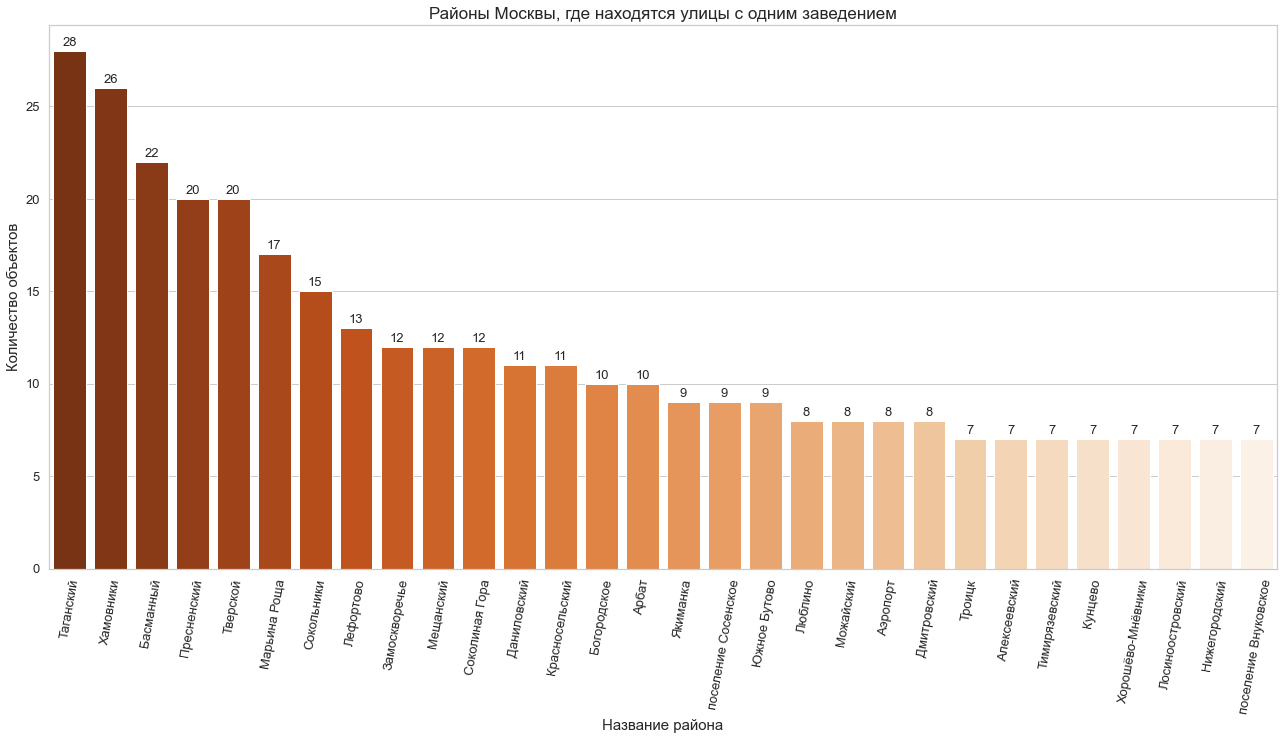

In [118]:
# построение столбчатой диаграммы
sns.set_theme(style='whitegrid')
plt.figure(figsize=(22,10))
plots = sns.barplot(x=one_rest_by_districts.index, y='number', data=one_rest_by_districts, palette='Oranges_r')
# добавление аннотаций к графику
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Районы Москвы, где находятся улицы с одним заведением', fontsize=17)
plt.tick_params(labelsize=13)
plt.xlabel('Название района', fontsize=15)
plt.xticks(rotation=80)
plt.ylabel('Количество объектов', fontsize=15)
plt.show()

**Выводы**

Мы определили, что на 646 улицах расположен всего один объект питания. Далее был произведен анализ, в каких районах расположены эти улицы. По районам топ-10 занимает центр и близлежащие районы: Таганский, Хамовники, Басманный, Пресненский, Тверской, Марьина Роща, Сокольники,	Лефортово, Соколиная Гора и Замоскворечье. Это можно объяснить тем фактом, что в центре города расположено много коротких улиц и переулков с небольшим количеством домов.

## Презентация

Презентация: https://disk.yandex.ru/i/pOLLixHytrJc_A

## Общие выводы

В результате анализа рынка общественного питания в Москве мы выяснили, что:
* В Москве больше всего кафе (40% от общего количества), столовых (17%) и ресторанов (15%);
* В Москве больше всего несетевых заведений (81% от общего количества), сетевых всего 19%;
* Сетевые заведения больше всего распространены в фаст-фуде (41% от количества заведений), кулинариях (29%) и ресторанах (24%);
* Для сетевых заведений характерно много заведений с небольшим количеством посадочных мест в каждом. Более 400 заведений вообще не имеют посадочных мест, наиболее распространенное значение посадочных мест - 40;
* Топ-3 по среднему количеству посадочных мест: столовые - 103 места, рестораны - 80 мест и бары - 35 мест;
* Если взять случайную сеть, то есть большая вероятность наткнуться на большую сеть (с количеством заведений больше 10) с небольшим числом посадочных мест (около 38);
* Топ-10 улиц по количеству заведений: проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная,	Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе и Кировоградская улица;
* Топ-10 районов по количеству заведений: Пресненский, Чертаново Центральное, Тропарево-Никулино, Аэропорт, Мещанский, Обручевский, Свиблово, Дорогомилово, Нагатино-Садовники и Фили-Давыдково;
* Топ-10 районов с улицами, где расположено всего одно заведение: Таганский, Хамовники, Басманный, Пресненский, Тверской, Марьина Роща, Сокольники,	Лефортово, Соколиная Гора и Замоскворечье.

Рекомендации:
* Наше робокафе однозначно должно быть в формате кафе, как самый популярный формат;
* Для начала заведение необходимо делать несетевым. В дальнейшем, при успешном развитии рекомендуется переходить на сетевой формат;
* Количество посадочных мест рекомендуется сделать в диапазоне 30-40 (среднее у кафе и в целом по заведениям);
* Районы расположения рекомендуется выбрать из топ-10 районов с улицами, где расположено наибольшее количество заведений. Это популярные места, с наибольшей проходимостью.